In [139]:
import pandas as pd
import numpy as np
from ALLCools.mcds import RegionDS
from ALLCools.dmr import call_dms, call_dmr


In [2]:
regions = ['AMY','PFC']
celltypes = ['Astro-Epen',
'Immune',
'Neuron',
'OPC-Oligo',
'Vascular']

In [3]:
celltype=celltypes[0]
region=regions[0]

In [103]:
df_hypo = pd.DataFrame()
df_hyper = pd.DataFrame()
dict_res = {}
for region in regions:
    for celltype in celltypes:
        try:
            df_hyper_hypo = pd.read_csv(f'/data2st1/junyi/output/dmr/{region}/{celltype}/dmr_stat.csv')
            hypo_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]<0).sum(axis=0)).T
            hypo_val.index = [f'{celltype}']
            df_hypo = pd.concat([df_hypo, hypo_val], axis=0)
            df_hypo.sort_index(inplace=True)
            df_hypo = df_hypo.T.sort_index().T

            hyper_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]>0).sum(axis=0)).T
            hyper_val.index = [f'{celltype}']
            df_hyper = pd.concat([df_hyper, hyper_val], axis=0)
            df_hyper.sort_index(inplace=True)
            df_hyper = df_hyper.T.sort_index().T
        except FileNotFoundError:
            print(f"File not found for {region} {celltype}.")
            continue

df_hyper_sum = df_hyper.groupby(df_hyper.index).sum()
df_hypo_sum = df_hypo.groupby(df_hypo.index).sum()

File not found for AMY Vascular.
File not found for PFC Vascular.


In [105]:
df_hyper_sum

,Astro-Epen,Immune,Neuron,OPC-Oligo,Vascular
Astro-Epen,0,9,150,1,3
Immune,19,4,170,14,10
Neuron,23,20,0,42,7
OPC-Oligo,1,16,209,0,4


In [104]:
df_hypo_sum

,Astro-Epen,Immune,Neuron,OPC-Oligo,Vascular
Astro-Epen,66,2,1,51,2
Immune,47,38,10,54,13
Neuron,9,9,115,3,4
OPC-Oligo,50,0,0,136,0


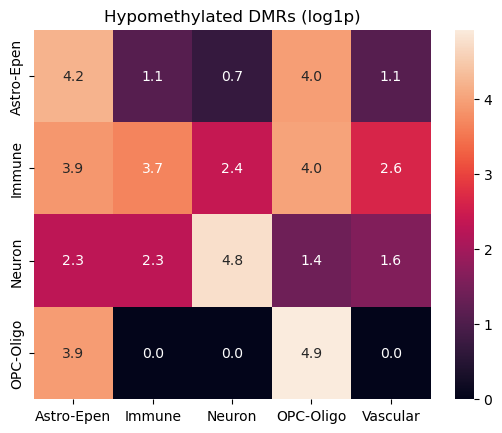

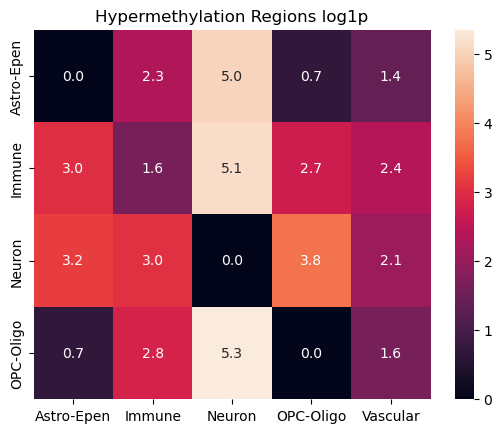

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# 生成随机数据
data = np.random.rand(10, 10)

# 绘制热力图
sns.heatmap(np.log(df_hyper_sum+1), annot=True, fmt=".1f")
plt.title('Hypermethylation Regions log1p')
plt.show()


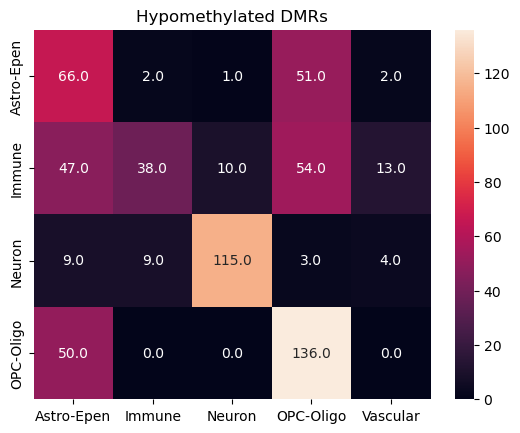

In [137]:
sns.heatmap(df_hypo_sum, annot=True, fmt=".1f")
plt.title('Hypomethylated DMRs')
plt.show()

In [43]:
region = 'PFC'
df_hypo = pd.DataFrame()
df_hyper = pd.DataFrame()
for celltype in celltypes:
    try:
        df_hyper_hypo = pd.read_csv(f'/data2st1/junyi/output/dmr/{region}/{celltype}/dmr_stat.csv')
        hypo_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]<0).sum(axis=0)).T
        hypo_val.index = [f'{region}_{celltype}']
        df_hypo = pd.concat([df_hypo, hypo_val], axis=0)

        hyper_val = pd.DataFrame((df_hyper_hypo.iloc[:,3:]>0).sum(axis=0)).T
        hyper_val.index = [f'{region}_{celltype}']
        df_hyper = pd.concat([df_hyper, hyper_val], axis=0)
    except FileNotFoundError:
        print(f"File not found for {region} {celltype}.")
        continue

File not found for PFC Vascular.


In [45]:
df_hypo

,Neuron,Astro-Epen,Vascular,Immune,OPC-Oligo
PFC_Astro-Epen,1,39,0,0,22
PFC_Immune,10,18,8,21,8
PFC_Neuron,66,6,3,4,3
PFC_OPC-Oligo,0,29,0,0,77


In [46]:
df_hyper

,Neuron,Astro-Epen,Vascular,Immune,OPC-Oligo
PFC_Astro-Epen,67,0,3,5,1
PFC_Immune,69,10,7,2,11
PFC_Neuron,0,12,7,12,16
PFC_OPC-Oligo,103,1,3,13,0


In [140]:
output_dir= '/data2st1/junyi/output/dmr/PFC/Nano_PFC_HIP'

In [141]:
dmr_ds = RegionDS.open(output_dir,)
dmr_ds


Using dmr as region_dim


<xarray.RegionDS>
Dimensions:      (count_type: 2, dmr: 164, sample: 5)
Coordinates:
  * count_type   (count_type) <U3 'mc' 'cov'
  * dmr          (dmr) <U8 'chr1-0' 'chr1-1' 'chr1-2' ... 'chr19-6' 'chrX-0'
    dmr_chrom    (dmr) <U5 dask.array<chunksize=(32,), meta=np.ndarray>
    dmr_end      (dmr) int64 dask.array<chunksize=(32,), meta=np.ndarray>
    dmr_length   (dmr) int64 dask.array<chunksize=(32,), meta=np.ndarray>
    dmr_ndms     (dmr) int64 dask.array<chunksize=(32,), meta=np.ndarray>
    dmr_start    (dmr) int64 dask.array<chunksize=(32,), meta=np.ndarray>
  * sample       (sample) <U10 'Neuron' 'Astro-Epen' ... 'Immune' 'OPC-Oligo'
Data variables:
    dmr_da       (sample, dmr, count_type) uint32 dask.array<chunksize=(1, 32, 1), meta=np.ndarray>
    dmr_da_frac  (sample, dmr) float32 dask.array<chunksize=(1, 32), meta=np.ndarray>
    dmr_state    (sample, dmr) int8 dask.array<chunksize=(1, 32), meta=np.ndarray>
Attributes:
    region_dim:          dmr
    region_ds_location:  /data2st1/junyi/output/dmr/PFC/Nano_PFC_HIP
    chrom_size_path:     /data2st1/junyi/output/dmr/PFC/Nano_PFC_HIP/chrom_si...

In [142]:
dms_ds = RegionDS.open(output_dir, region_dim='dms')
dms_ds


<xarray.RegionDS>
Dimensions:       (count_type: 2, dms: 943, sample: 5)
Coordinates:
  * count_type    (count_type) <U3 'mc' 'cov'
  * dms           (dms) <U15 'chr1-37820074' ... 'chrX-162898192'
    dms_chrom     (dms) <U5 dask.array<chunksize=(188,), meta=np.ndarray>
    dms_contexts  (dms) <U3 dask.array<chunksize=(188,), meta=np.ndarray>
    dms_p-values  (dms) float64 dask.array<chunksize=(188,), meta=np.ndarray>
    dms_pos       (dms) int64 dask.array<chunksize=(188,), meta=np.ndarray>
  * sample        (sample) <U10 'Neuron' 'Astro-Epen' ... 'Immune' 'OPC-Oligo'
Data variables:
    dms_da        (sample, dms, count_type) float64 dask.array<chunksize=(1, 188, 1), meta=np.ndarray>
    dms_da_frac   (sample, dms) float64 dask.array<chunksize=(1, 188), meta=np.ndarray>
    dms_residual  (sample, dms) float64 dask.array<chunksize=(1, 188), meta=np.ndarray>
Attributes:
    region_dim:          dms
    region_ds_location:  /data2st1/junyi/output/dmr/PFC/Nano_PFC_HIP
    chrom_size_path:     /data2st1/junyi/output/dmr/PFC/Nano_PFC_HIP/chrom_si...

In [147]:
dms_ds['dms'].to_numpy()

array(['chr1-37820074', 'chr1-62743828', 'chr1-62743838', 'chr1-62770058',
       'chr1-62770060', 'chr1-62770065', 'chr1-62827558', 'chr1-62827575',
       'chr1-62827595', 'chr1-62827599', 'chr1-62827603', 'chr1-62827610',
       'chr1-62906031', 'chr1-62906036', 'chr1-62906039', 'chr1-62906054',
       'chr1-62906055', 'chr1-62906057', 'chr1-89142809', 'chr1-89510795',
       'chr1-89510796', 'chr1-89510802', 'chr1-89510803', 'chr1-89510824',
       'chr1-89510829', 'chr1-89510830', 'chr1-89510840', 'chr1-89510841',
       'chr1-89510846', 'chr1-89558374', 'chr1-89558376', 'chr1-89558378',
       'chr1-89558384', 'chr1-90486464', 'chr1-90486467', 'chr1-90486468',
       'chr1-90486518', 'chr1-93857684', 'chr1-93857685', 'chr1-93857718',
       'chr1-93857719', 'chr1-93857734', 'chr1-93857735', 'chr1-93857737',
       'chr1-93857738', 'chr1-101287004', 'chr1-107487141',
       'chr1-107487143', 'chr1-107487145', 'chr1-107487149',
       'chr1-107487151', 'chr1-107487153', 'chr1-12612

In [180]:
dmr_ds['dmr_start'][:].to_numpy()   

array([ 62743827,  62770059,  62827574,  62906035,  89142808,  89510794,
        89510845,  89558373,  90486466,  93857683, 107487148, 132730271,
       190655779,   9185810,  12325574,  28178126,  31499923,  31899742,
        35491132,  52248846,  59508645,  71750083,  71750086, 125141912,
       125606739, 146325000, 166517703, 168399180, 173340354, 173340375,
       173340427, 173340442, 179120153,   8956132,  51545019,  51660550,
        51928215,  52001591,  52001614,  52575314,  52601258,  92250912,
       101513728, 114345334, 122129231,  12629409,  20123100,  31921099,
        45421039,  62467641,  87087398,  97779720,  97783137,  97783315,
       111597080, 111597086, 111597099, 148292153, 151356011, 151376421,
        48001119,  97256518, 103845635, 123501658, 128418454, 131094182,
       131586015, 131586092, 131855293, 142604954, 149002496,  14812008,
        52055565,  91996127,  35732989,  36896562,  37744154,  46104602,
        50230830, 136341901, 138687973,  49828388, 

In [181]:
dmr_ds['dmr_end'][:].to_numpy()   

array([ 62743829,  62770061,  62827600,  62906056,  89142810,  89510842,
        89510847,  89558385,  90486469,  93857739, 107487154, 132730273,
       190655804,   9185822,  12325589,  28178141,  31500084,  31899811,
        35491290,  52248859,  59508671,  71750085,  71750186, 125141927,
       125606774, 146325007, 166517727, 168399345, 173340376, 173340427,
       173340441, 173340444, 179120325,   8956375,  51545028,  51660552,
        51928268,  52001604,  52001691,  52575394,  52601311,  92250921,
       101513833, 114345336, 122129284,  12629452,  20123117,  31921103,
        45421047,  62467649,  87087414,  97779760,  97783139,  97783318,
       111597083, 111597088, 111597107, 148292170, 151356058, 151376427,
        48001121,  97256560, 103845715, 123501660, 128418764, 131094233,
       131586046, 131586094, 131855560, 142604961, 149002498,  14812020,
        52055575,  91996132,  35733037,  36896572,  37744171,  46104658,
        50230846, 136341903, 138687975,  49828413, 

In [148]:
df_dar = pd.read_csv('/data1st2/hannan_25/data/Nanopore_process/nanopore_08_differential/pair_base/C_dmrpair_F_HIP_vs_PFC.segment',sep='\t',header=None,index_col=None)
df_dar.columns = ['chr','start','end','state','scores','nsties','counta','couontb','pcta','pctb','fraca','fracb','effectsize']
df_dar_selected = df_dar[(df_dar['state'].isin(['different'])) & (df_dar['chr'].str.len()<=2) & (df_dar['fracb']>0.1) & (df_dar['effectsize']<0)]
df_dar_selected['regionmm10'] = 'chr'+df_dar_selected['chr'] + ':' + df_dar_selected['start'].astype(str) + '-' + df_dar_selected['end'].astype(str)
df_dar_selected['region_extended'] = 'chr'+df_dar_selected['chr'] + ':' + (df_dar_selected['start']-5000).astype(str) + '-' + (df_dar_selected['end']+5000).astype(str)

/tmp/ipykernel_3779903/1512998197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_selected['regionmm10'] = 'chr'+df_dar_selected['chr'] + ':' + df_dar_selected['start'].astype(str) + '-' + df_dar_selected['end'].astype(str)
/tmp/ipykernel_3779903/1512998197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dar_selected['region_extended'] = 'chr'+df_dar_selected['chr'] + ':' + (df_dar_selected['start']-5000).astype(str) + '-' + (df_dar_selected['end']+5000).astype(str)


In [175]:
df_dar[df_dar['state'].isin(['different'])  & (df_dar['effectsize']<0)]

,chr,start,end,state,scores,nsties,counta,couontb,pcta,pctb,fraca,fracb,effectsize
1,1,3064927,3064929,different,26.685243,2,"h:0,m:0","h:0,m:19","h:0.00,m:0.00","h:0.00,m:48.72",0.000000,0.487179,-0.487179
3,1,3734993,3734995,different,37.454968,2,"h:0,m:1","h:0,m:37","h:0.00,m:2.70","h:0.00,m:92.50",0.027027,0.925000,-0.897973
19,1,6526617,6526633,different,28.960890,6,"h:4,m:3","h:5,m:34","h:1.77,m:1.33","h:3.88,m:26.36",0.030973,0.302326,-0.271352
21,1,6527054,6527089,different,13.846013,14,"h:7,m:11","h:12,m:29","h:1.36,m:2.13","h:4.04,m:9.76",0.034884,0.138047,-0.103163
27,1,7026106,7026107,different,18.837102,1,"h:0,m:0","h:0,m:9","h:0.00,m:0.00","h:0.00,m:90.00",0.000000,0.900000,-0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39126,Y,90807380,90807382,different,30.930988,2,"h:0,m:18","h:0,m:36","h:0.00,m:3.05","h:0.00,m:25.17",0.030457,0.251748,-0.221291
39128,Y,90807414,90807415,different,35.765283,1,"h:0,m:2","h:2,m:19","h:0.00,m:0.47","h:2.70,m:25.68",0.004739,0.283784,-0.279044
39132,Y,90807806,90807826,different,14.077198,10,"h:67,m:769","h:78,m:342","h:1.63,m:18.73","h:3.96,m:17.34",0.203604,0.212982,-0.009377
39134,Y,90808876,90808878,different,9.732585,2,"h:38,m:446","h:40,m:185","h:4.71,m:55.33","h:12.08,m:55.89",0.600496,0.679758,-0.079262


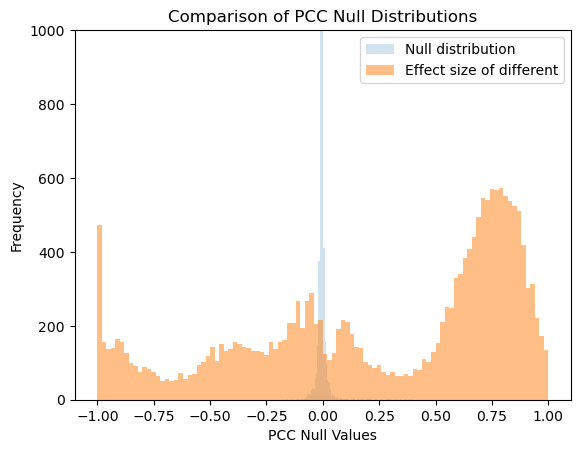

In [173]:
plt.hist(df_dar[df_dar['state']=="same"]['effectsize'], bins=100, alpha=0.2, label='Null distribution')
plt.hist(df_dar[(df_dar['state']=="different") & (df_dar['effectsize']!=0)]['effectsize'], bins=100, alpha=0.5, label='Effect size of different')
plt.legend()
plt.xlabel('PCC Null Values')
plt.ylabel('Frequency')
plt.title('Comparison of PCC Null Distributions')
#plt.xlim(-0.5,0.5)

plt.ylim(0,1000)
# plt.axvline(np.percentile(df_pccs['pcc_null'],95), color='r', linestyle='-' )  # y=position, color, linestyle
# plt.text(np.percentile(df_pccs['pcc_null'],95) +0.01, 2000, f'95% cutoff', color='r')  # Position text at (x=1, y=5.1)
plt.show()
# plt.savefig(f'/data2st1/junyi/output/cCRE/{region}_{celltype}_circe_pccs.png')